In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
tips = pd.read_csv('../10_Pandas/cuentas.csv')

Seaborn incluye un interesante conjunto de datasets que pueden ser utilizados para probar las distintas visualizaciones. La función disponible para la carga de estos conjuntos de datos es seaborn.load_dataset, devolviendo un dataframe pandas.

In [2]:
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño
0,16.99,1.01,Mujer,No,Domingo,Comida,2
1,10.34,1.66,Hombre,No,Domingo,Comida,3
2,21.01,3.50,Hombre,No,Domingo,Comida,3
3,23.68,3.31,Hombre,No,Domingo,Comida,2
4,24.59,3.61,Mujer,No,Domingo,Comida,4


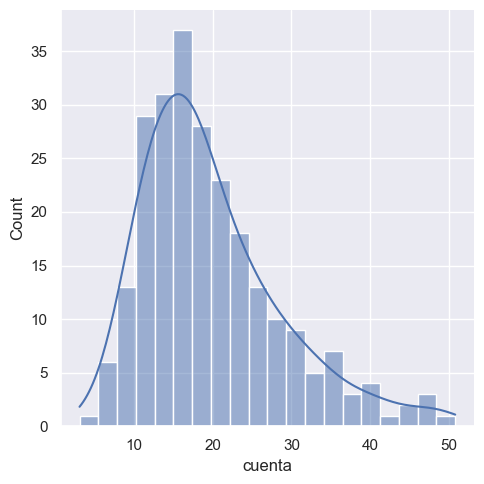

In [3]:
sns.set_theme(style="darkgrid") #todos los gráficos van a tener este estilo
sns.displot(tips['cuenta'], kde = True, bins=20)

<Axes: xlabel='cuenta', ylabel='Density'>

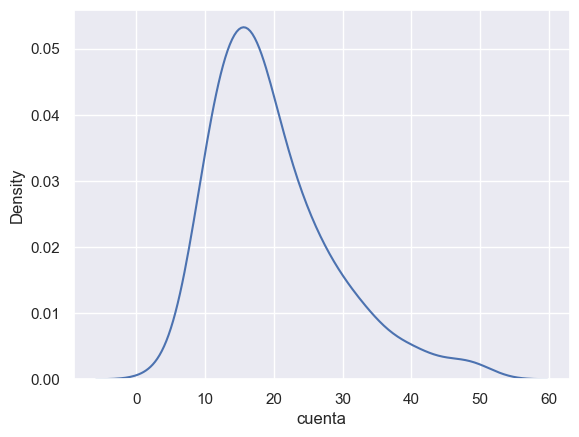

In [4]:
sns.kdeplot(tips['cuenta']) #pintamos solo la estimación

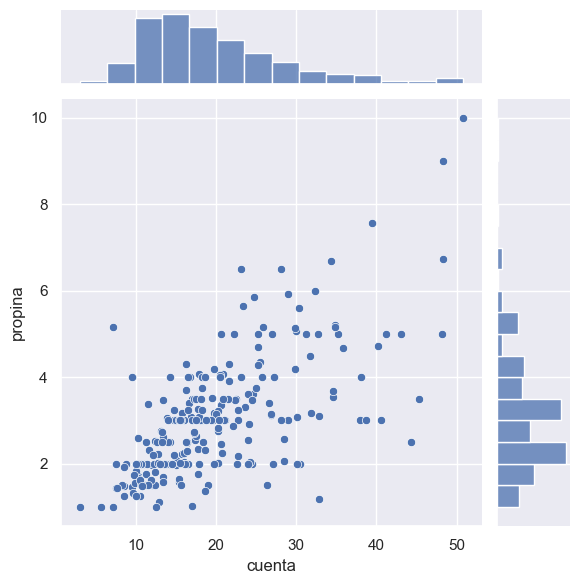

In [5]:
sns.jointplot(x='cuenta', y='propina',data=tips)

C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


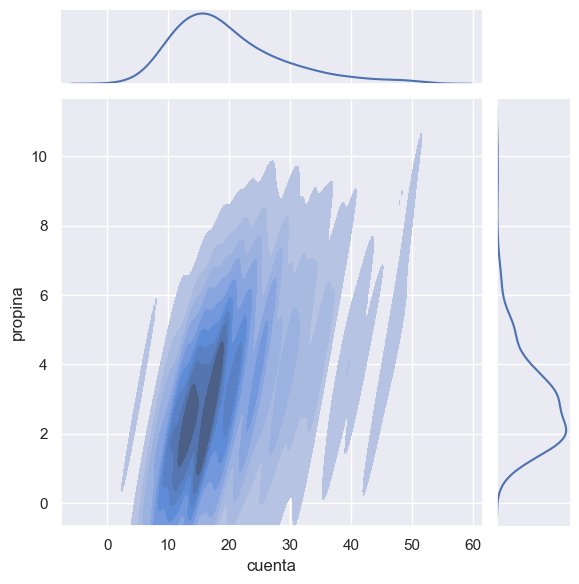

In [6]:
sns.jointplot(x='cuenta', y='propina', data=tips, kind='kde', shade = True)

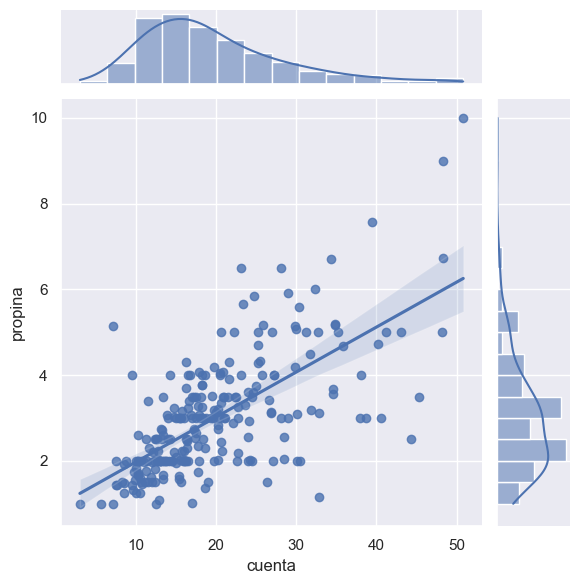

In [7]:
sns.jointplot(x='cuenta', y='propina', data=tips, kind='reg')

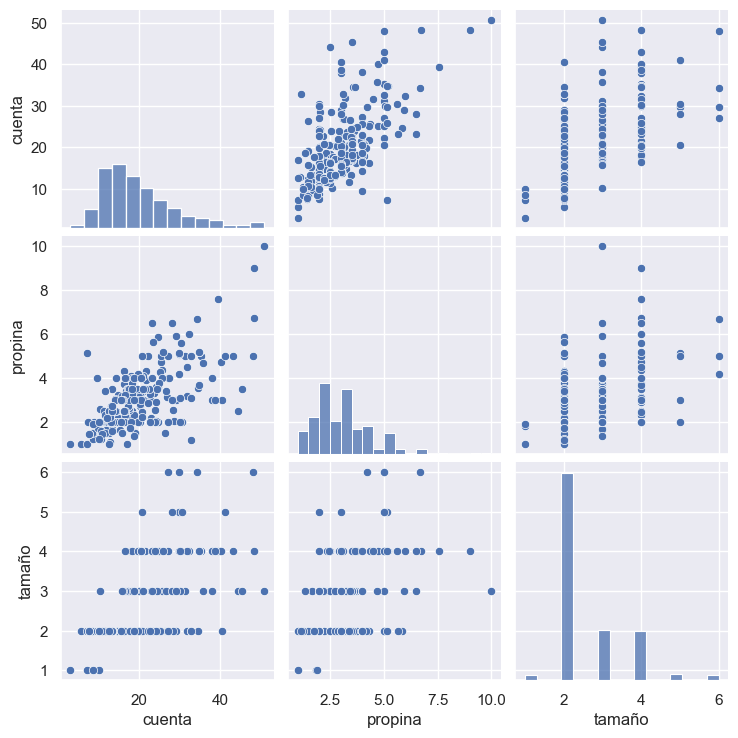

In [8]:
sns.pairplot(tips)

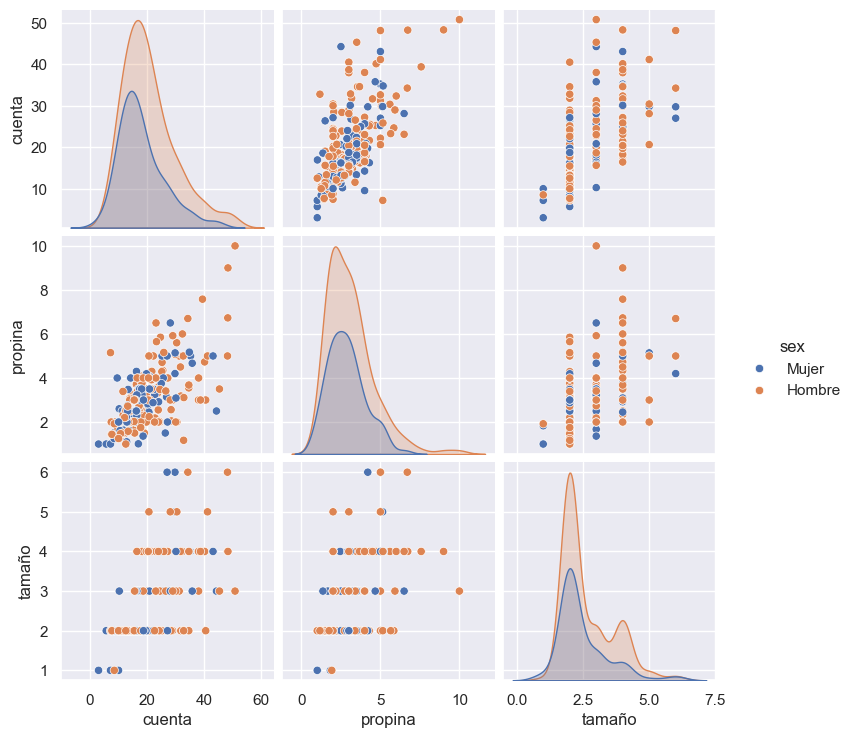

In [21]:
sns.pairplot(tips,hue='sex')

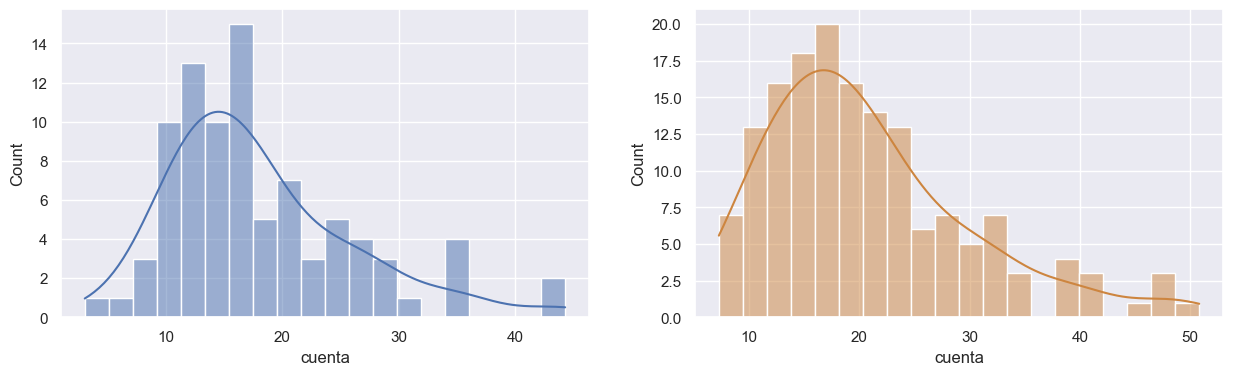

In [10]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15, 4))
sns.histplot(tips[tips['sex']=='Mujer']['cuenta'], kde = True, bins=20, ax=ax1)
sns.histplot(tips[tips['sex']=='Hombre']['cuenta'], kde = True,color='peru', bins=20, ax=ax2)
plt.show()

<Axes: xlabel='sex', ylabel='cuenta'>

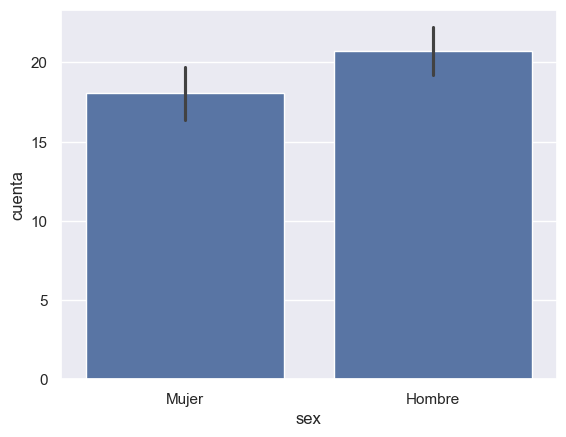

In [11]:
sns.barplot(x = 'sex', y = 'cuenta', data = tips, estimator = np.mean)

<Axes: xlabel='sex', ylabel='cuenta'>

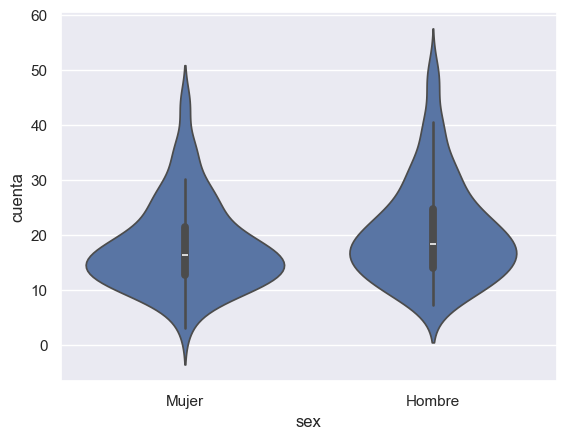

In [12]:
sns.violinplot(x='sex', y='cuenta', data=tips)

<Axes: xlabel='día', ylabel='cuenta'>

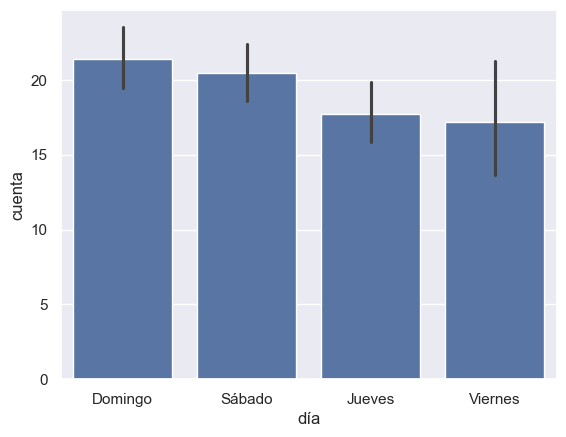

In [13]:
sns.barplot(x='día', y='cuenta', data=tips)

In [14]:
print( "Hombres ",tips[tips['sex']=='Hombre']['cuenta'].mean()," \u00B1 " , tips[tips['sex']=='Hombre']['cuenta'].std())
print( "Mujeres ",tips[tips['sex']=='Mujer']['cuenta'].mean()," \u00B1 ", tips[tips['sex']=='Mujer']['cuenta'].std())

Hombres  20.744076433121016  ±  9.24646876154476
Mujeres  18.056896551724133  ±  8.009208988951961


<Axes: xlabel='día', ylabel='cuenta'>

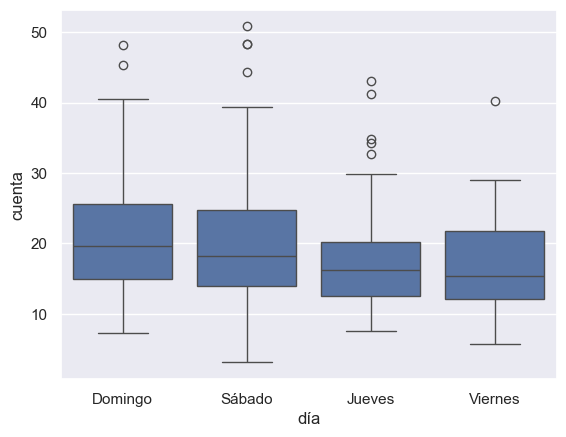

In [15]:
sns.boxplot(x='día', y='cuenta', data=tips)

<Axes: xlabel='día', ylabel='cuenta'>

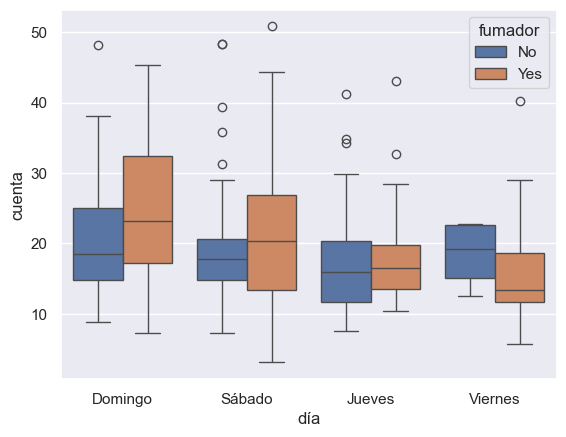

In [16]:
sns.boxplot(x='día', y='cuenta', data=tips, hue='fumador')

<Axes: xlabel='día', ylabel='cuenta'>

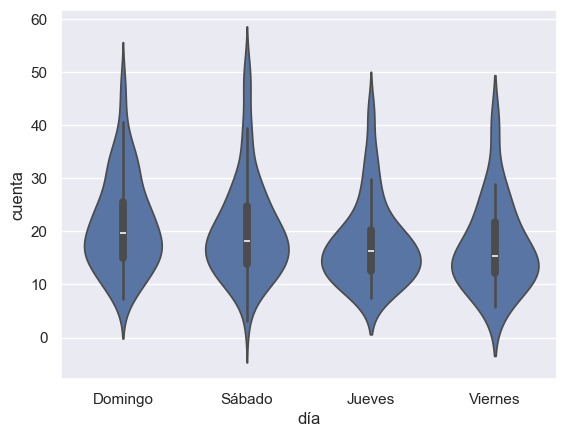

In [17]:
sns.violinplot(x='día', y='cuenta', data=tips)

<Axes: xlabel='día', ylabel='cuenta'>

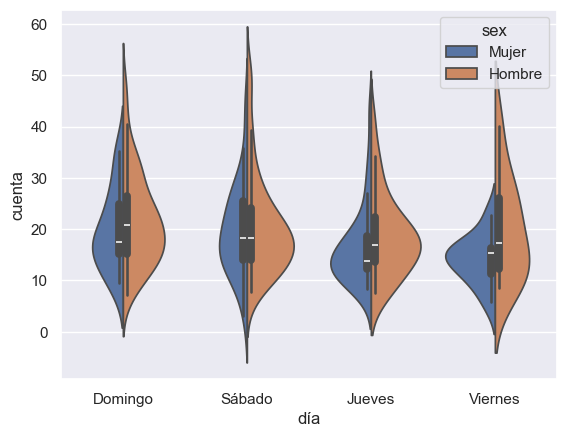

In [18]:
sns.violinplot(x='día', y='cuenta', data=tips, hue='sex', split=True)

<Axes: xlabel='día', ylabel='cuenta'>

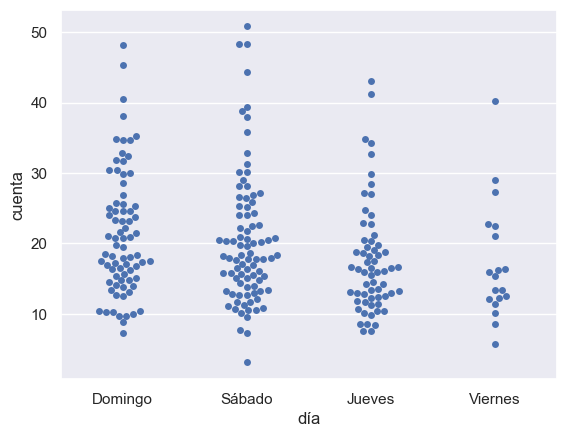

In [19]:
# Nos da la posibilidad de ver todos los puntos que hacen referencia a cada fila del dataset
sns.swarmplot(x='día', y='cuenta', data=tips)

<Axes: >

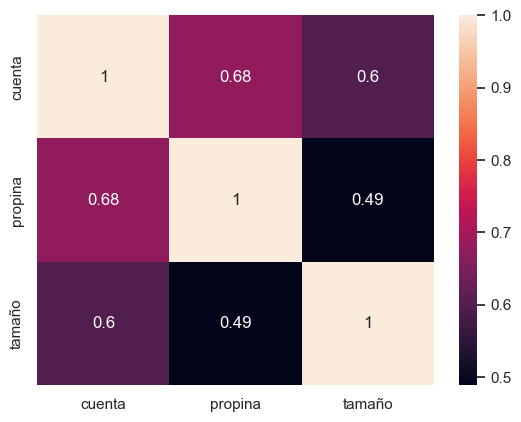

In [23]:
columnas_numericas = tips.select_dtypes(include=['float64', 'int64'])
sns.heatmap(columnas_numericas.corr(), annot = True)

<Axes: >

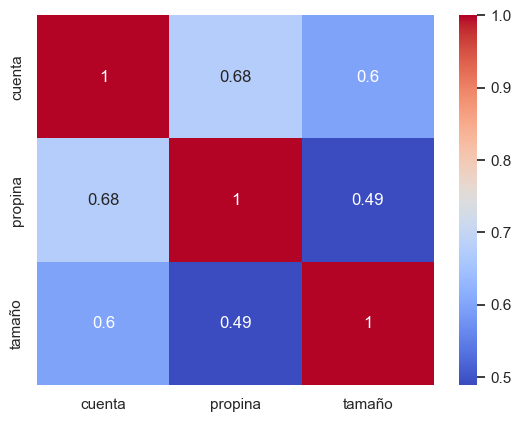

In [28]:
sns.heatmap(columnas_numericas.corr(), annot = True, cmap = 'coolwarm')

In [29]:
tips['col_random'] = np.random.randn(len(tips))
tips['total'] = tips['cuenta'] + tips['propina']
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño,col_random,total
0,16.99,1.01,Mujer,No,Domingo,Comida,2,0.646938,18.00
1,10.34,1.66,Hombre,No,Domingo,Comida,3,0.392854,12.00
2,21.01,3.50,Hombre,No,Domingo,Comida,3,0.974607,24.51
3,23.68,3.31,Hombre,No,Domingo,Comida,2,-0.223465,26.99
4,24.59,3.61,Mujer,No,Domingo,Comida,4,0.889939,28.20


<Axes: >

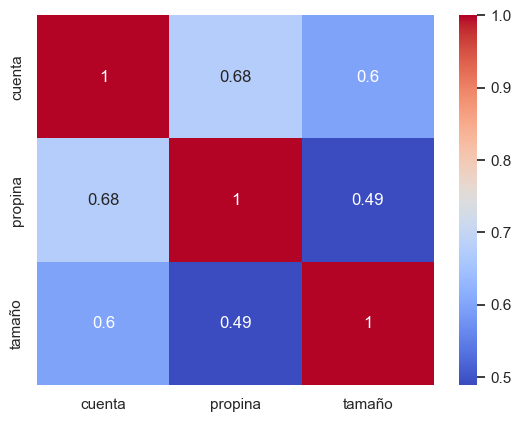

In [30]:
sns.heatmap(columnas_numericas.corr(), annot = True, cmap = 'coolwarm')

In [31]:
tips['col2_random'] = np.random.randn(len(tips))
tips.head()

,cuenta,propina,sex,fumador,día,hora,tamaño,col_random,total,col2_random
0,16.99,1.01,Mujer,No,Domingo,Comida,2,0.646938,18.00,0.229006
1,10.34,1.66,Hombre,No,Domingo,Comida,3,0.392854,12.00,-0.719820
2,21.01,3.50,Hombre,No,Domingo,Comida,3,0.974607,24.51,-0.460956
3,23.68,3.31,Hombre,No,Domingo,Comida,2,-0.223465,26.99,1.711694
4,24.59,3.61,Mujer,No,Domingo,Comida,4,0.889939,28.20,-1.068342


<Axes: >

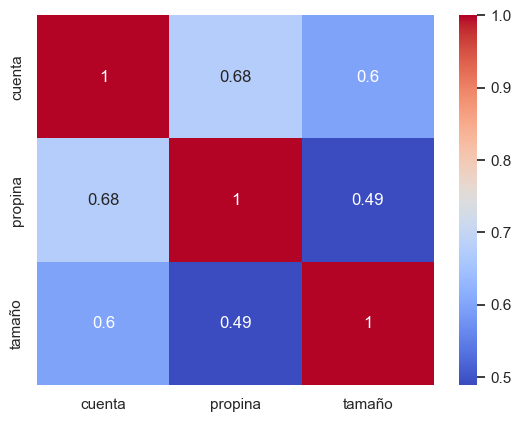

In [33]:
sns.heatmap(columnas_numericas.corr(), annot = True, cmap = 'coolwarm')

Veamos otro ejemplo, imaginemos una material que esta 100ºC en el centro de una superficie cuadrada, tenemos que las paredes estan a 0ºC, es decir:

In [34]:
A = np.zeros([50,50])
A[int(len(A)/2),int(len(A)/2)] = 100

<Axes: >

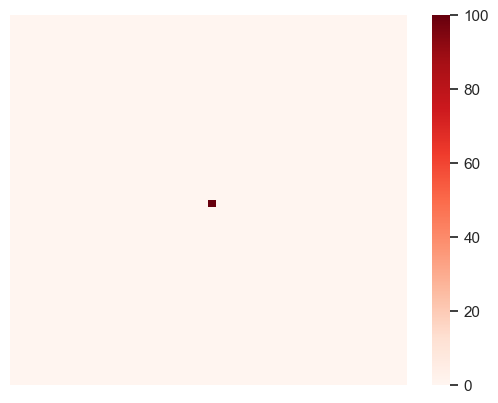

In [35]:
sns.heatmap(A, cmap = 'Reds', yticklabels=False, xticklabels=False)


Vamos a hacer una difución del calor utilizando solo los 4 primero vecinos, es decir:

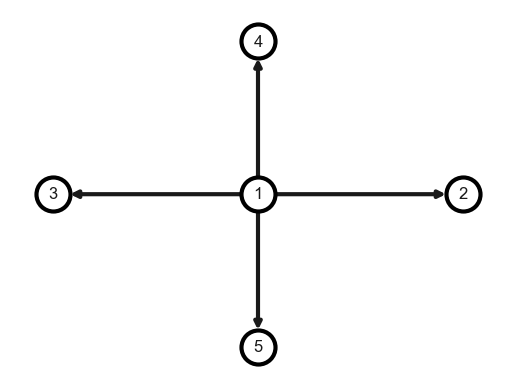

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph([(1, 2),(1, 2),(1, 3),(1, 4),(1, 5)])
L=1.0
pos = {1: (0, 0), 2: (L, 0), 3: (-L, 0), 4: (0,L), 5: (0,-L)}
options = {"font_size": 12,"node_size": 600,"node_color": "white","edgecolors": "black","linewidths": 3,"width": 3,}
nx.draw_networkx(G, pos, **options)
plt.axis("off")
plt.show()

<Axes: >

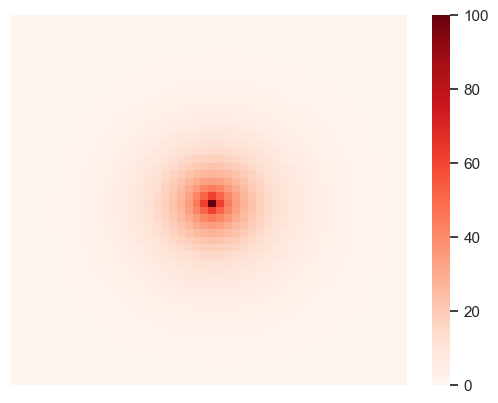

In [41]:
#Difundimos el calor
for t in range(100):
    for i in range(1,len(A)-1):
        for j in range(1,len(A)-1):
            A[i][j]=(A[i+1][j]+A[i-1][j]+A[i][j+1]+A[i][j-1])/4
            A[int(len(A)/2),int(len(A)/2)] = 100
            
sns.heatmap(A, cmap = 'Reds', yticklabels=False, xticklabels=False)

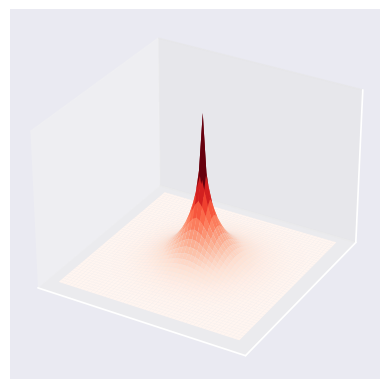

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(len(A))
Y = np.arange(len(A))
X, Y = np.meshgrid(X, Y)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
surf = ax.plot_surface(X, Y, A, cmap='Reds',linewidth=0)
 

Seaborn tiene incorporados algunos dataset, fijate en el siguiente que contiene información sobre vuelos.

In [43]:
flights = sns.load_dataset('flights')
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [44]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

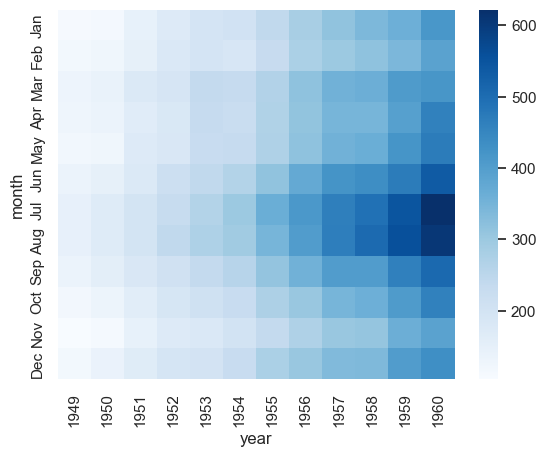

In [45]:
sns.heatmap(fp, cmap = 'Blues')

<Axes: xlabel='year', ylabel='month'>

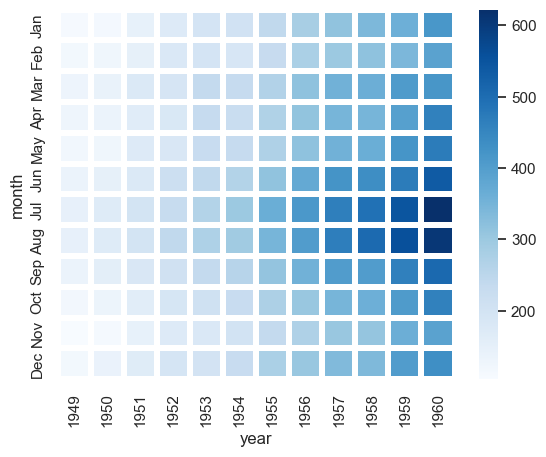

In [46]:
sns.heatmap(fp, cmap = 'Blues', linecolor = 'white', linewidths = 3)

In [47]:
# La función clustermap() de seaborn traza un mapa de calor agrupado 
#jerárquicamente del conjunto de datos de matriz dado.

sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)

RuntimeError: clustermap requires scipy to be available